# Projects in AL/ML Homework 2

Thomas Dou - 662039950 - dout@rpi.edu

## Task 1

Note: dataset was updated from homework 1. Originally, "bad" (class 0) wines were those rated 6 or lower and "good" (class 1) wines were rated above 6. I changed the boundaries so that a wine rated six is now considered a "good" wine. Distribution of datapoints went from

3838 class 0 - 1060 class 1

to

1640 class 0 - 3258 class 1

### Question 2

In [ ]:
#unpacking data

import pandas as pd
import numpy as np

path = 'winequality_cleaned.csv'

data = pd.read_csv(path, sep = ";")
data.head()

x = data.drop(columns=["quality"])
y = data["quality"]

x.head()
y.head()

,quality
0,1
1,1
2,1
3,1
4,1


In [ ]:
#preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=67
)

num_cols = x_train.select_dtypes(include=np.number).columns

numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols)
    ]
)

model_default = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier())
])

model_default.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

Accuracy: 0.776
Log Loss: 8.091
F1: 0.773


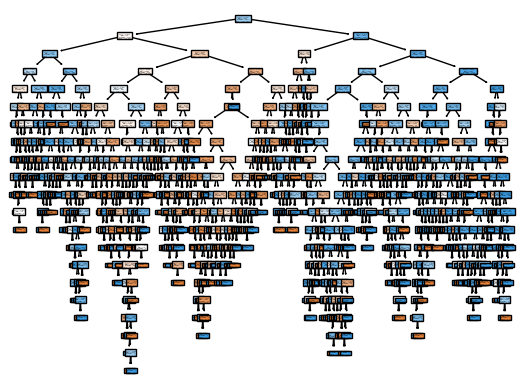

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

y_pred = model_default.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Log Loss: {log_loss_val:.3f}")
print(f"F1: {f1:.3f}")

clf = model_default.named_steps["classifier"]
plt.figure()
plot_tree(clf, filled=True)
plt.show()

Accuracy: 0.762
Log Loss: 8.570
F1: 0.759


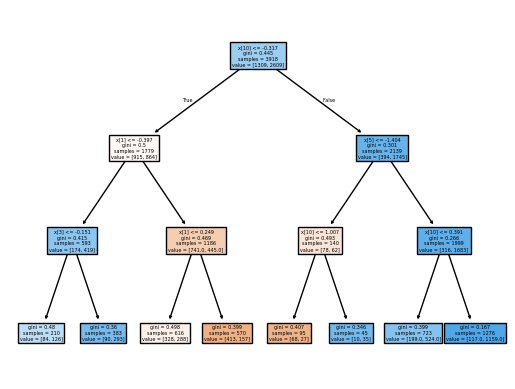

In [ ]:
# limiting tree size
model_size_restrict = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier(max_depth = 3, max_leaf_nodes=10))
])

model_size_restrict.fit(x_train, y_train)

y_pred = model_size_restrict.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Log Loss: {log_loss_val:.3f}")
print(f"F1: {f1:.3f}")

clf = model_size_restrict.named_steps["classifier"]
plt.figure()
plot_tree(clf, filled=True)
plt.show()

Accuracy: 0.794
Log Loss: 7.429
F1: 0.792


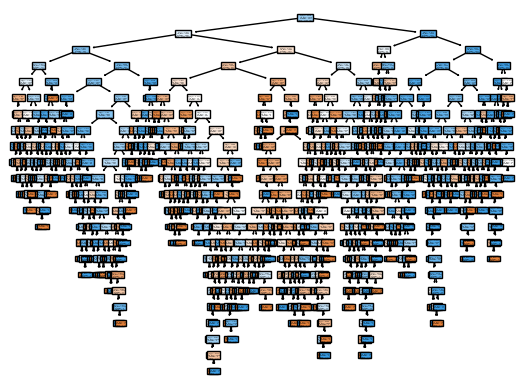

In [ ]:
# setting criterion to log loss
model_log_loss = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier(criterion="log_loss"))
])

model_log_loss.fit(x_train, y_train)

y_pred = model_log_loss.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Log Loss: {log_loss_val:.3f}")
print(f"F1: {f1:.3f}")

clf = model_log_loss.named_steps["classifier"]
plt.figure()
plot_tree(clf, filled=True)
plt.show()

Accuracy: 0.710
Log Loss: 10.445
F1: 0.701


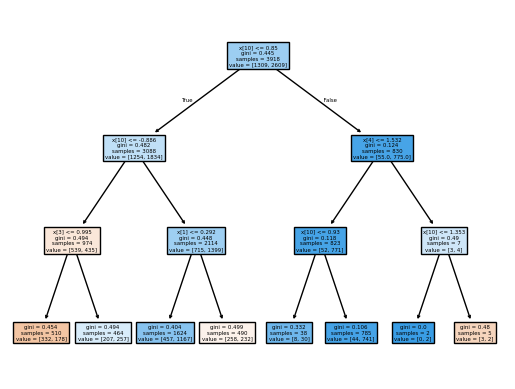

In [ ]:
# setting splitting to random

model_random_split = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier(splitter="random", max_depth = 3, max_leaf_nodes=10))
])

model_random_split.fit(x_train, y_train)

y_pred = model_random_split.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Log Loss: {log_loss_val:.3f}")
print(f"F1: {f1:.3f}")


clf = model_random_split.named_steps["classifier"]
plt.figure()
plot_tree(clf, filled=True)
plt.show()


Each tree above represents one parameter setting for a decision tree classifier. When limits on the depth and number of nodes are placed on the classifier, the tree (and therefore the boundary curve) becomes substantially less complex. This may be beneficial to mitigate overfitting in some cases, though in our case, limitations on shape resulted in less accurate classifiers on test data. Additionally, modifications to the decision making scheme affect shape and performance. Swapping out Gini impurity to log loss minimizing yielded a complex tree but best performance on out-sample data, whereas allowing random splitting over optimized splitting typically resulted in lower performance when controlling for tree shape.

### Task 2 Part 2:

I will perform a sensitivity analysis technique described in [1] by mapping input sensitivity to output by varying the feature's value while holding all other features to their mean. Per the source, we will use half steps as the independent value.

[1] https://towardsdatascience.com/the-sensitivity-analysis-a-powerful-yet-underused-tool-for-data-scientists-e553fa695976/

In [ ]:
stats = dict()

for col_name in x_train.columns:
  colmean = x_train[col_name].mean()
  colmax = x_train[col_name].max()
  colmin = x_train[col_name].min()

  stats[col_name] = (colmean, colmax, colmin)

#print(stats)


average_datapoint = x_train.mean().to_frame().T
print(average_datapoint)
y_prob = model_random_split.predict_proba(average_datapoint)
y_pred = model_random_split.predict(average_datapoint)
print(y_prob)
print(y_pred)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.849821          0.277462     0.334181        6.419398   0.045653   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            35.380807             138.31317  0.994044  3.187312   0.489798   

     alcohol  
0  10.507246  
[[0.28140394 0.71859606]]
[1]


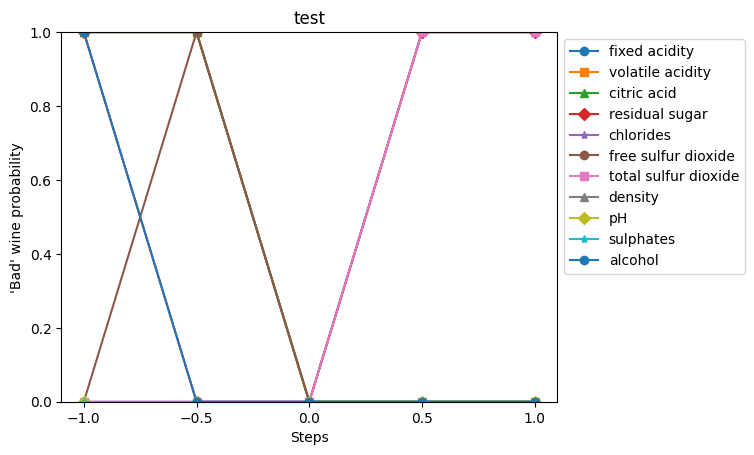

In [ ]:
from matplotlib import pyplot as plt
import itertools

def generate_bad_wine_contribution(model, title = "title"):
  fig, ax = plt.subplots()
  ax.set_ylim(0,1)
  ax.set_xlabel("Steps")
  ax.set_ylabel("\'Bad\' wine probability")
  ax.set_title(title)
  steps = [-1, -0.5, 0, 0.5, 1]
  markers = itertools.cycle(['o', 's', '^', 'D', '*'])

  n = 0

  for col_name in x_train.columns:

    probs = list()

    average_datapoint = x_train.mean().to_frame().T
    colmean, colmax, colmin = stats[col_name]

    minus_half_step = 0.5*(colmin + colmean)
    half_step = 0.5*(colmean + colmax) # calculating half step values

    step_vals = [colmin, minus_half_step, colmean, half_step, colmax]
    for value in step_vals:
      # making y values
      average_datapoint[col_name] = value
      #print(average_datapoint.to_numy)
      y_prob = model.predict_proba(average_datapoint)
      #print(col_name, "=", value, y_prob)

      probs.append(y_prob[0][0])

    marker = next(markers)
    ax.plot(steps, probs, marker=marker, label=col_name)

  plt.xticks(steps)
  ax.legend(bbox_to_anchor=(1, 1))
  #return fig


generate_bad_wine_contribution(model_default, "test")
plt.show()

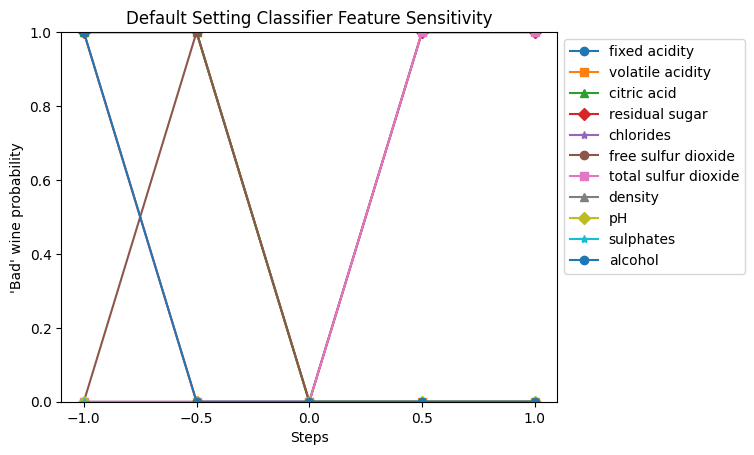

In [ ]:
# Default Setting Classifier Feature Sensitivity
generate_bad_wine_contribution(model_default, "Default Setting Classifier Feature Sensitivity")
plt.show()

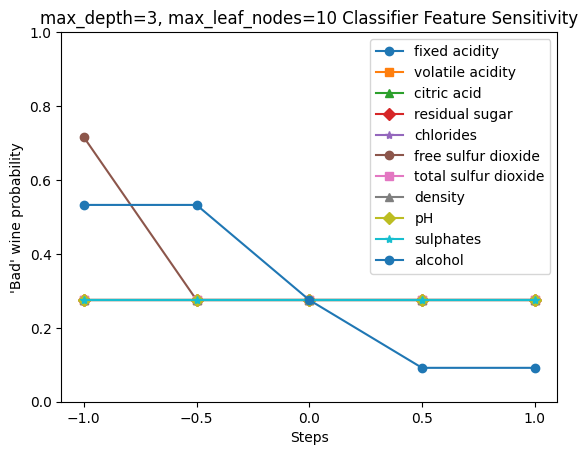

In [ ]:
# max_depth=3, max_leaf_nodes=10 Classifier Feature Sensitivity
generate_bad_wine_contribution(model_size_restrict, "max_depth=3, max_leaf_nodes=10 Classifier Feature Sensitivity")
plt.show()

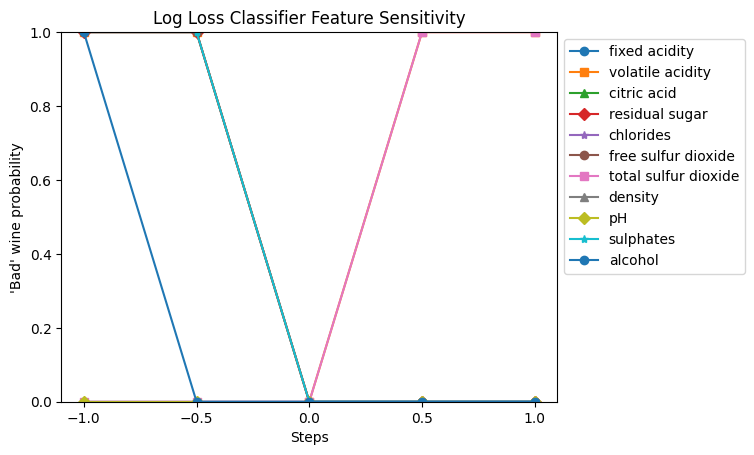

In [ ]:
# Log Loss Classifier Feature Sensitivity
generate_bad_wine_contribution(model_log_loss, "Log Loss Classifier Feature Sensitivity")
plt.show()

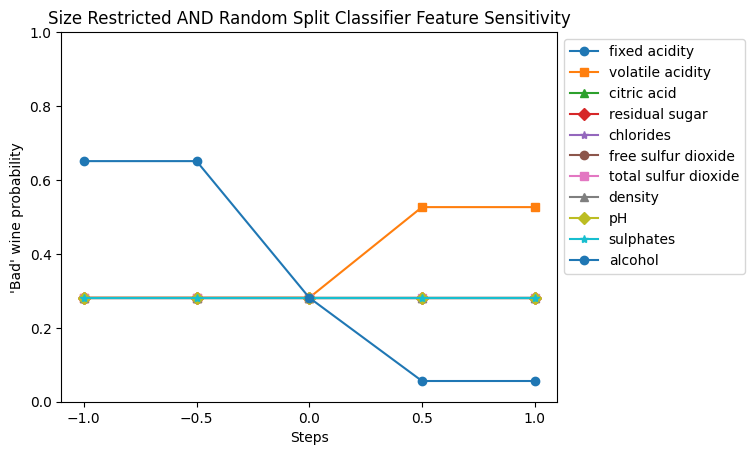

In [ ]:
# Size Restricted AND Random Split Classifier Feature Sensitivity
generate_bad_wine_contribution(model_random_split, "Size Restricted AND Random Split Classifier Feature Sensitivity")
plt.show()

## Discussion:
Based on the graphs of the partial contribution of each, the most consistently consequentual attribute is the alcohol percentage. This means that in each of the classification trees, one of the higher nodes is most likely classifies based on alcohol percentage. Additionally, for the model types with no shape restrictions (default, log loss), confidence of classifications was very high, which is likely a consequence of high certainty from there being so many delineators at each node.

# Task 2

Bagging method: Random forest [1]

Boosting method: Adaboost [2]

[1] https://machinelearningmastery.com/random-forest-ensemble-in-python/
[2]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std


model_rand_forest = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier())
])

model_rand_forest.fit(x_train, y_train)

# sanity check
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=420)
n_scores = cross_val_score(model_rand_forest, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.830 (0.014)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", AdaBoostClassifier())
])

model_adaboost.fit(x_train, y_train)


# sanity check
cv = RepeatedStratifiedKFold(n_splits=10, random_state=420)
n_scores = cross_val_score(model_adaboost, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (max(n_scores), std(n_scores)))

Accuracy: 0.796 (0.017)


In [ ]:
print(len(n_scores))

100


In [ ]:
from sklearn.model_selection import cross_validate

#using log loss, F1, and accuracy

# 5, 10, 15, 20 folds
for n in range(1, 2):
  cv = RepeatedStratifiedKFold(n_splits=(n+1)*5, random_state=420)
  n_scores = cross_val_score(model_rand_forest,
                             x_train, y_train,
                             scoring='accuracy',
                             cv=cv, n_jobs=-1,
                             error_score='raise')

  cv_out = cross_validate(
        model_rand_forest,
        x_train,
        y_train,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1,
        return_estimator=True,
        error_score="raise"
    )

  rand_forest_scores = cv_out["test_score"]
  best_idx = int(np.argmax(rand_forest_scores))
  best_model_rand_forest = cv_out["estimator"][best_idx]

  print(f"Fold Count: {(n+1)*5}")
  print('\tCross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

  y_proba = best_model_rand_forest.predict_proba(x_test)
  y_pred = np.argmax(y_proba, axis=1)

  accuracy = accuracy_score(y_test, y_pred)
  log_loss_val = log_loss(y_test, y_proba)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(f"\t\t Test Accuracy: {accuracy:.3f}")
  print(f"\t\t Test Log Loss: {log_loss_val:.3f}")
  print(f"\t\t Test F1: {f1:.3f}")

print(rand_forest_scores)


Fold Count: 10
	Cross Validation Accuracy: 0.830 (0.016)
		 Test Accuracy: 0.835
		 Test Log Loss: 0.375
		 Test F1: 0.831
[0.82653061 0.81632653 0.84183673 0.84183673 0.83163265 0.80867347
 0.83418367 0.84438776 0.8056266  0.8056266  0.85714286 0.82397959
 0.81377551 0.81122449 0.83928571 0.82142857 0.85204082 0.84693878
 0.82608696 0.81841432 0.8494898  0.81887755 0.80867347 0.82908163
 0.83418367 0.85969388 0.83163265 0.80102041 0.83120205 0.82097187
 0.80867347 0.81887755 0.81632653 0.83928571 0.81122449 0.83418367
 0.83418367 0.8494898  0.83887468 0.84910486 0.82908163 0.83928571
 0.81122449 0.85969388 0.84183673 0.82653061 0.85969388 0.81887755
 0.81841432 0.82097187 0.84183673 0.82142857 0.81632653 0.83673469
 0.82653061 0.84693878 0.83928571 0.81377551 0.81329923 0.84654731
 0.85459184 0.85204082 0.83418367 0.83928571 0.81632653 0.83928571
 0.80357143 0.83673469 0.83375959 0.81841432 0.80102041 0.83418367
 0.82908163 0.83928571 0.8494898  0.83418367 0.85459184 0.83928571
 0.815


Saving output in text data because cross validation is time consuming.
```
Fold Count: 5
	Cross Validation Accuracy: 0.824 (0.010)
		 Test Accuracy: 0.815
		 Test Log Loss: 0.382
		 Test F1: 0.810
Fold Count: 10
	Cross Validation Accuracy: 0.831 (0.015)
		 Test Accuracy: 0.836
		 Test Log Loss: 0.368
		 Test F1: 0.831
Fold Count: 15
	Cross Validation Accuracy: 0.834 (0.020)
		 Test Accuracy: 0.830
		 Test Log Loss: 0.363
		 Test F1: 0.825
Fold Count: 20
	Cross Validation Accuracy: 0.834 (0.021)
		 Test Accuracy: 0.834
		 Test Log Loss: 0.364
		 Test F1: 0.829
```



In [ ]:
# 5, 10, 15, 20 folds

max_cv_accuracy = 0.0
max_cv_accuracy_scores = None

for n in range(1, 2):
  cv = RepeatedStratifiedKFold(n_splits=(n+1)*5, random_state=420)
  n_scores = cross_val_score(model_adaboost, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

  cv_out = cross_validate(
        model_adaboost,
        x_train,
        y_train,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1,
        return_estimator=True,
        error_score="raise"
    )

  adaboost_scores = cv_out["test_score"]
  best_idx = int(np.argmax(adaboost_scores))
  best_model_adaboost = cv_out["estimator"][best_idx]


  print(f"Fold Count: {(n+1)*5}")
  print('\tCross Validation Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

  y_proba = best_model_adaboost.predict_proba(x_test)
  y_pred = np.argmax(y_proba, axis=1)

  accuracy = accuracy_score(y_test, y_pred)
  log_loss_val = log_loss(y_test, y_proba)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(f"\t\t Test Accuracy: {accuracy:.3f}")
  print(f"\t\t Test Log Loss: {log_loss_val:.3f}")
  print(f"\t\t Test F1: {f1:.3f}")


print(max_cv_accuracy_scores)


Fold Count: 10
	Cross Validation Accuracy: 0.757 (0.017)
		 Test Accuracy: 0.791
		 Test Log Loss: 0.573
		 Test F1: 0.785
None




```
Fold Count: 5
	Cross Validation Accuracy: 0.757 (0.012)
		 Test Accuracy: 0.782
		 Test Log Loss: 0.576
		 Test F1: 0.774
Fold Count: 10
	Cross Validation Accuracy: 0.757 (0.017)
		 Test Accuracy: 0.791
		 Test Log Loss: 0.573
		 Test F1: 0.785
Fold Count: 15
	Cross Validation Accuracy: 0.755 (0.022)
		 Test Accuracy: 0.769
		 Test Log Loss: 0.572
		 Test F1: 0.762
Fold Count: 20
	Cross Validation Accuracy: 0.757 (0.028)
		 Test Accuracy: 0.770
		 Test Log Loss: 0.572
		 Test F1: 0.763
```



The four metrics I used were test accuracy, log loss, and F1. Throughout each cross validation fold, higher binary accuracy saw higher F1 scores, though log loss seemed not to change substantially across different fold sizes and different classifiers. Mean cross validation accuracy also did not typically mean better F1 or accuracy scores. Overall, however, cross validation with random forest saw substantially better performance on test data, but took about three times as long to perform than Adaboost.

## Task 4

In [ ]:
from scipy.stats import ttest_rel

#performing t-test on 20 fold output of each
t_statistic, p_value = ttest_rel(adaboost_scores, rand_forest_scores)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: -45.2544761546051
P-value: 1.0565580197578987e-106


Results on 20 fold vs 20 fold scores t-test (may not be replicable without rewriting above code):

```
T-statistic: -45.2544761546051
P-value: 1.0565580197578987e-106
```
Based on the scores, it seems overwhelmingly likely that cross-validation scores are independent, having P value well below 0.01.


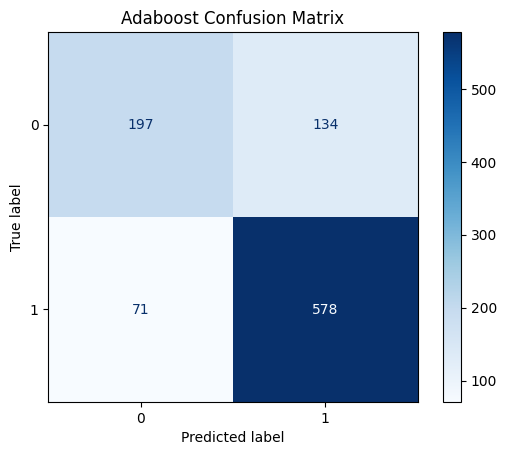

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_proba = best_model_adaboost.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_
                              )

disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Adaboost Confusion Matrix")
plt.show()


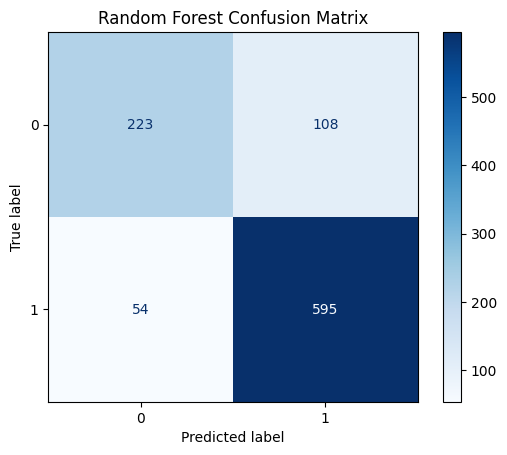

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_proba = best_model_rand_forest.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_
                              )

disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Random Forest Confusion Matrix")
plt.show()

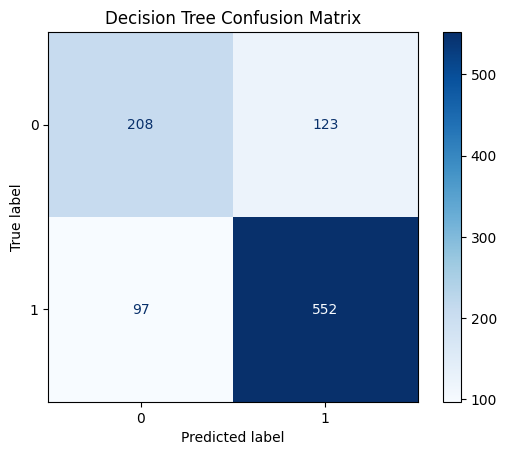

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_proba = model_default.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_
                              )

disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Decision Tree Confusion Matrix")
plt.show()

Each method used has a different relationship to the bias-variance tradeoff. Decision trees, particularly the default tree with hundreds of nodes, have very high variance, and are therefore prone to overfitting. Bagging methods on the other hand are designed to reduce variance by aggregating multiple simple learners and finding a comprimise between them. This is contrasted with boosting methods which attempt to use an ensemble to create a more complex classifier, thereby greatly increasing variance.